## Imports

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import torch
from torch import Tensor

from typing import Callable
from typing import Dict

In [2]:
IMAGE_FOLDER = "../images/graphs/01_foundations/"

### Basic function definitions

In [3]:
# y = x^2
from typing import Callable

Tensor_Function = Callable[[Tensor], Tensor]

def deriv(func: Tensor_Function, 
          input: Tensor, 
          diff: float = 0.001) -> Tensor:
    '''
    Evaluates the derivative of a function f at every element in the Tensor.
    '''
    return (func(input + diff) - func(input - diff)) / (2 * diff)

In [4]:
def relu(x: Tensor) -> Tensor:
    '''
    Apply "ReLU" function to Tensor
    '''
    return torch.clamp(x, min=0)

In [5]:
a = Tensor([[1, 2], 
           [3, 4]])

def square(x: Tensor) -> Tensor:
    '''
    Square each element in the input Tensor.
    '''
    return x.pow(2)

deriv(square, a)

tensor([[ 2.0000,  3.9999],
        [ 5.9996,  7.9999]])

### First plot

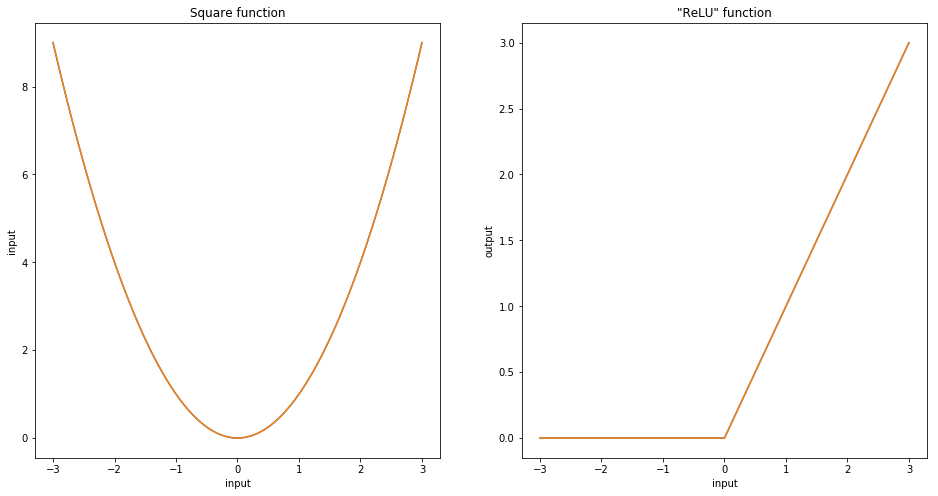

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))  # 2 Rows, 1 Col

input_range = torch.range(-3, 3, 0.01)

ax[0].plot(input_range.numpy(), square(input_range).numpy())
ax[0].plot(input_range.numpy(), square(input_range).numpy())
ax[0].set_title('Square function')
ax[0].set_xlabel('input')
ax[0].set_ylabel('input')

ax[1].plot(input_range.numpy(), relu(input_range).numpy())
ax[1].plot(input_range.numpy(), relu(input_range).numpy())
ax[1].set_title('"ReLU" function')
ax[1].set_xlabel('input')
ax[1].set_ylabel('output');

plt.savefig("../images/01_foundations/00_x_vs_x_squared.png")

### Decorators

In [8]:
class deriv_dec(object):

    def __init__(self, f: Tensor):
        self.f = f

    def __call__(self, input: Tensor,
                 diff: float = 0.001):
        '''
        Evaluates the derivative of a function f at every element in the Tensor.
        '''
        return (self.f(input + diff) - self.f(input - diff)) / (2 * diff)

In [9]:
class plot_function_range_dec(object):

    def __init__(self, f):
        self.f = f

    def __call__(self, input_range):
        output_range = self.f(input_range)
        plt.plot(input_range.numpy(), output_range.numpy());

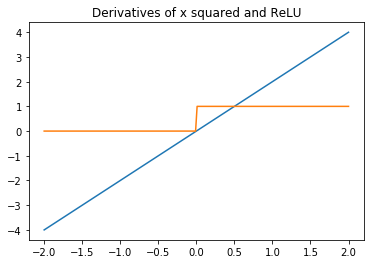

In [10]:
@plot_function_range_dec
@deriv_dec
def square(x: Tensor) -> Tensor:
    '''
    Square each element in the input Tensor.
    '''
    return x ** 2

@plot_function_range_dec
@deriv_dec
def relu(x: Tensor) -> Tensor:
    '''
    Apply "ReLU" function to Tensor
    '''
    return torch.clamp(x, min=0)

square(torch.range(-2, 2, 0.01))
relu(torch.range(-2, 2, 0.01))
plt.title("Derivatives of x squared and ReLU")
plt.savefig(IMAGE_FOLDER + "09_derivatives_range.png")

### Function definition

$$ f(E) = P $$ 

is equivalent to 

```python
def f(input_tensor: Tensor) -> Tensor:
    # Some transformation(s)
    return output_tensor

P = f(E)
```

### Chain rule

In [11]:
def square(x: Tensor) -> Tensor:
    '''
    Square each element in the input Tensor.
    '''
    return x.pow(2)

def sigmoid(x: Tensor) -> Tensor:
    '''
    Square each element in the input Tensor.
    '''
    return 1 / (1 + torch.exp(-x))

In [14]:
# y = x^2
from typing import List

Function = Callable[[Tensor], Tensor]
Chain = List[Function]

def chain_length_2(chain: Chain,
                   t: Tensor) -> Tensor:
    '''
    Evaluates two functions in a row, in a "Chain".
    '''
    assert len(chain) == 2, \
    "Length of input Chain should be 2"
    
    f1 = chain[0]
    f2 = chain[1]
    
    return f2(f1(x))

In [15]:
def chain_deriv_2(chain: Chain,
                  input_range: Tensor) -> Tensor:
    '''
    Uses the chain rule to compute the derivative of two nested functions:

    '''

    assert len(chain) == 2, \
    "This function requires 'Chain' objects of length 2"

    assert input_range.dim() == 1, \
    "Function requires a 1 dimensional Tensor as input_range"

    f1 = chain[0]
    f2 = chain[1]

    # f1(x)
    f1_of_x = f1(input_range)

    # f1'(x)
    f1_prime = deriv(f1, input_range)

    # f2'(f1(x))
    f2_prime = deriv(f2, f1(input_range))

    # Multiplying these quantities together at each point
    return f1_prime.mul(f2_prime)

### Chain rule

In [17]:
def plot_chain(chain: Chain, 
                     input_range: Tensor) -> None:
    '''
    Plots a chain function - a function made up of 
    multiple consecutive Tensor -> Tensor mappings - across one
    '''
    
    assert input_range.dim() == 1, \
    "message"
    output_range = chain_function(chain, input_range)
    plt.plot(input_range.numpy(), output_range.numpy())

In [18]:
def plot_chain_deriv(chain: Chain,
                     input_range: Tensor) -> Tensor:
    '''
    Uses the chain rule to plot the derivative of two nested functions:
    '''
    output_range = chain_deriv_2(chain, input_range)
    plt.plot(input_range.numpy(), output_range.numpy())

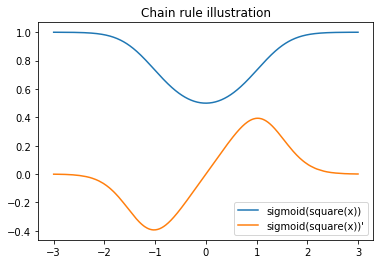

In [19]:
PLOT_RANGE = torch.range(-3, 3, 0.01)
plot_chain([square, sigmoid], PLOT_RANGE)
plot_chain_deriv([square, sigmoid], PLOT_RANGE)
plt.title("Chain rule illustration")
plt.legend(["sigmoid(square(x))", "sigmoid(square(x))'"])
plt.savefig(IMAGE_FOLDER + "15.1_chain_rule_illustration_1.png");

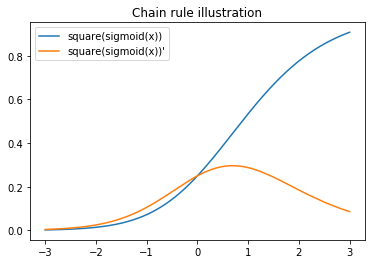

In [20]:
plot_chain([sigmoid, square], torch.range(-3, 3, 0.01))
plot_chain_deriv([sigmoid, square], torch.range(-3, 3, 0.01))
plt.title("Chain rule illustration")
plt.legend(["square(sigmoid(x))", "square(sigmoid(x))'"])
plt.savefig(IMAGE_FOLDER + "15.2_chain_rule_illustration_2.png");

### Chain rule: three functions

In [21]:
def leaky_relu(x: Tensor) -> Tensor:
    '''
    Apply "ReLU" function to Tensor
    '''
    return torch.max(0.2 * x, x)

In [23]:
def chain_deriv_3(chain: Chain,
                  input_range: Tensor) -> Tensor:
    '''
    Uses the chain rule to compute the derivative of two nested functions:
    '''
    
    assert len(chain) == 3
    
    f1 = chain[0]
    f2 = chain[1]
    f3 = chain[2]
    
    # f1'(x)
    f1_of_x = f1(input_range)
    
    # f2(f1(x))
    f2_of_x = f2(f1_of_x)
    
    # f3'f2(f1(x))
    f3_prime = deriv(f3, f2_of_x)
    
    # f2'(f1(x))
    f2_prime = deriv(f2, f1_of_x)
    
    # f1'(x)
    f1_prime = deriv(f1, input_range)
    
    # Multiplying these quantities together at each point
    return torch.mul(torch.mul(f3_prime, f2_prime), f1_prime)

In [25]:
def plot_chain_deriv(chain: Chain,
                     input_range: Tensor) -> Tensor:
    '''
    Uses the chain rule to plot the derivative of two nested functions:
    '''
    output_range = chain_deriv_3(chain, input_range)
    plt.plot(input_range.numpy(), output_range.numpy())

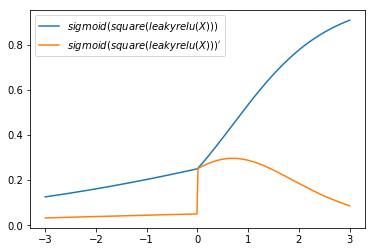

In [28]:
plot_chain([leaky_relu, sigmoid, square], PLOT_RANGE)
plot_chain_deriv([leaky_relu, sigmoid, square], PLOT_RANGE)
plt.legend(["$sigmoid(square(leakyrelu(X)))$", "$sigmoid(square(leakyrelu(X)))'$"])
plt.savefig(IMAGE_FOLDER + "11_plot_function_derivative_1.png")

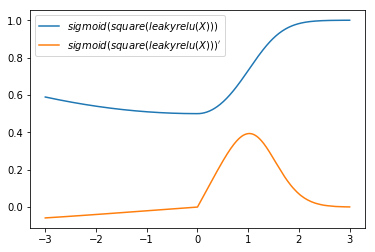

In [29]:
plot_chain([leaky_relu, square, sigmoid], PLOT_RANGE)
plot_chain_deriv([leaky_relu, square, sigmoid], PLOT_RANGE)
plt.legend(["$sigmoid(square(leakyrelu(X)))$", "$sigmoid(square(leakyrelu(X)))'$"])
plt.savefig(IMAGE_FOLDER + "11_plot_function_derivative_2.png")

### Cross product multiply

In [36]:
def tensor_size(tensor: Tensor) -> int:
    '''
    Returns the number of elements in a 1D Tensor
    '''
    assert tensor.dim() == 1, \
    "Input tensors must be 1 dimensional"
    
    return list(tensor.size())[0]

In [46]:
def to_2d(a: Tensor, 
          type: str="col") -> Tensor:
    '''
    Turns a 1D Tensor into 2D
    '''

    assert a.dim() == 1, \
    "Input tensors must be 1 dimensional"
    
    if type == "col":        
        return a.reshape(tensor_size(a), 1)
    elif type == "row":
        return a.reshape(1, tensor_size(a))

In [47]:
def cross_product_multiply(t1: Tensor, 
                           t2: Tensor) -> Tensor:
    '''
    Cross product multiply of two 1D Tensors
    '''
    
    assert t1.dim() == 1, \
    "Input tensors must be 1 dimensional"
    assert t2.dim() == 1, \
    "Input tensors must be 1 dimensional"
    
    t1 = to_2d(t1, "row")
    t2 = to_2d(t2, "col")
    
    return t1.mul(t2)

### Simple forward and simple backward

In [32]:
def simple_forward(sigma: Function,
                   X: Tensor,
                   Y: Tensor) -> Tensor:
    '''

    '''

    m = cross_product_multiply(X, Y)

    return sigma(m)

In [34]:
def simple_backward(sigma: Function,
                    X: Tensor,
                    Y: Tensor) -> Dict[str, Tensor]:
    '''
    Compute the derivative of f with respect to X
    '''

    c = cross_product_multiply(X, Y)

    sigma_prime_y = deriv(sigma, c)

    # Note: to_2d is a helper function that transforms 1D arrays into 2D vectors
    Y_2d = to_2d(Y)

    return Y_2d.mul(sigma_prime_y)

### Take slices and plot result

In [38]:
def plot_two_ranges(range1: Tensor, 
                    range2: Tensor) -> None:

    assert range1.dim() == 1
    assert range2.dim() == 1
    
    plt.plot(range1.numpy(), range2.numpy())

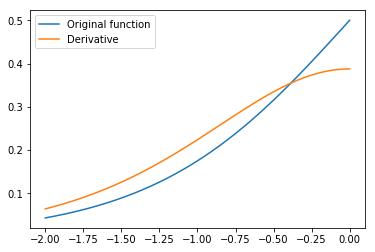

In [39]:
X = torch.range(-2, 0, 0.01)
Y = torch.range(0, 2, 0.01)

forward = simple_forward(sigmoid, X, Y)

import random
random.seed(51618)
r = random.randint(1, 201)

backward = simple_backward(sigmoid, X, Y)

plot_two_ranges(X, forward[r])
plot_two_ranges(X, backward[r])
plt.legend(["Original function", "Derivative"])
plt.savefig(IMAGE_FOLDER + "12_simple_function_derivative.png")

### Complex function

In [40]:
def cross_product_add(t1: Tensor, 
                      t2: Tensor) -> Tensor:
    '''
    Cross product multiply of two 1D Tensors
    '''
    
    assert t1.dim() == 1, \
    "Input tensors must be 1 dimensional"
    assert t2.dim() == 1, \
    "Input tensors must be 1 dimensional"
    
    t1 = to_2d(t1, "row")
    t2 = to_2d(t2, "col")
    
    return t1.add(t2)

In [48]:
a = Tensor([1, 2])
b = Tensor([3, 4])
cross_product_add(a, b)

tensor([[ 4.,  5.],
        [ 5.,  6.]])

In [65]:
def complex_forward(e: Function,
                    f: Function,
                    g: Function,
                    h: Function,
                    j: Function,
                    k: Function,
                    X: Tensor,
                    Y: Tensor) -> Dict[str, Tensor]:
    '''
    Uses the chain rule to compute the derivative of two nested functions:
    '''

    e_output = e(X)

    f_output = f(e_output)

    g_output = g(Y)

    h_output = h(g_output)

    I = cross_product_add(f_output, h_output)

    forward_info: Dict[str, Tensor] = {}
    forward_info['E'] = e_output
    forward_info['F'] = f_output
    forward_info['G'] = g_output
    forward_info['H'] = h_output
    forward_info['I'] = I
    forward_info['J'] = j(I)
    forward_info['K'] = k(I)

    return forward_info

In [66]:
def square(x: Tensor) -> Tensor:
    '''
    Square each element in the input Tensor.
    '''
    return torch.pow(x, 2)

def relu(x: Tensor) -> Tensor:
    '''
    Apply "ReLU" function to Tensor
    '''
    return torch.clamp(x, min=0)

def sqrt(x: Tensor) -> Tensor:
    '''
    Square root of each element in the input Tensor.
    '''
    return torch.sqrt(x+1)

def poly(x: Tensor) -> Tensor:
    '''
    Square each element in the input Tensor.
    '''
    return x ** 3 + x + 1

In [67]:
def deriv_k_wrt_y(e: Function,
                  f: Function,
                  g: Function,
                  h: Function,
                  j: Function,
                  k: Function,
                  X: Tensor,
                  Y: Tensor) -> Tensor:
    '''
    Uses the chain rule to compute the derivative of two nested functions:
    '''

    assert X.shape == Y.shape, \
    "Input ranges must be the same shape"

    forward_info = complex_forward(e, f, g, h, j, k, X, Y)

    k_prime_i = deriv(k, forward_info['I'])
    
    # Applying the fact that, if i(f, h) = f + h, di/dh = 1
    i_prime_h = torch.ones_like(k_prime_i)
    k_prime_h = k_prime_i * i_prime_h

    # Using the matrix factorization trick to compute dk/dg = dk/dh * dh/dg
    h_prime_g = to_2d(deriv(h, forward_info['G']))
    k_prime_g = h_prime_g.mul(k_prime_h)

    # Using the matrix factorization trick to compute dk/dy = dk/dg * dg/dy    
    g_prime_y = to_2d(deriv(g, Y))
    k_prime_y = g_prime_y.mul(k_prime_g)

    return k_prime_y

### Plotting complex results

In [68]:
import random
random.seed(52218)
r = random.randint(1, 201)

In [69]:
x_range = torch.range(-2, 0, 0.01)
y_range = torch.range(0, 2, 0.01)

forward_info = complex_forward(poly, sigmoid, square, relu, sqrt, sigmoid,
                               x_range, 
                               y_range)
forward = forward_info['K'][:, r]

backward_info = deriv_k_wrt_y(poly, sigmoid, square, relu, sqrt, sigmoid,
                              x_range, 
                              y_range)

backward = backward_info[:, r]

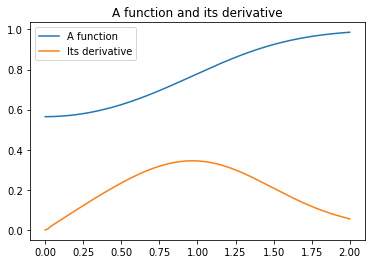

In [70]:
plot_two_ranges(y_range, forward)
plot_two_ranges(y_range, backward)
plt.title("A function and its derivative")
plt.legend(["A function", "Its derivative"])
plt.savefig(IMAGE_FOLDER + "14_a_function_and_its_derivative.png");